In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn


In [2]:
train_data=pd.read_csv('./training_data.csv')
test_data=pd.read_csv('./test_data.csv')
train_data.head()

,url_id,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,1,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,2,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,3,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,5,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
4,6,731,10,370,0.559889,1.0,0.698198,2,2,0,...,0.136364,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,855


In [3]:
train_data.shape

(28786, 61)

In [4]:
train_data.columns

Index(['url_id', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_s

In [5]:
train_data.describe()

,url_id,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,...,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000,28786.00000,28786.000000,28786.000000,28786.000000
mean,19878.678524,353.520635,10.403460,546.455082,0.555111,1.006600,0.695780,10.873063,3.301674,4.548496,...,0.095110,0.756500,-0.260026,-0.522700,-0.107939,0.282659,0.07220,0.341162,0.156628,3428.658549
std,11461.174637,214.420324,2.121334,470.409467,4.130828,6.138155,3.830214,11.155409,3.868232,8.342588,...,0.070577,0.247865,0.127850,0.290469,0.095253,0.323911,0.26614,0.189085,0.226958,12693.940388
min,1.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.00000,0.000000,0.000000,1.000000
25%,9916.250000,163.000000,9.000000,245.000000,0.470735,1.000000,0.625926,4.000000,1.000000,1.000000,...,0.050000,0.600000,-0.329167,-0.700000,-0.125000,0.000000,0.00000,0.166667,0.000000,940.250000
50%,19922.500000,337.000000,10.000000,410.000000,0.539302,1.000000,0.691043,8.000000,3.000000,1.000000,...,0.100000,0.800000,-0.253756,-0.500000,-0.100000,0.150000,0.00000,0.500000,0.000000,1400.000000
75%,29852.750000,542.000000,12.000000,716.000000,0.608527,1.000000,0.755155,14.000000,4.000000,4.000000,...,0.100000,1.000000,-0.187500,-0.300000,-0.050000,0.500000,0.15000,0.500000,0.250000,2800.000000
max,39643.000000,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,162.000000,74.000000,128.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.500000,1.000000,843300.000000


In [6]:
y=train_data.iloc[:,-1]
train_data.drop(['url_id'],axis=1,inplace=True)
ids=test_data['url_id']
test_data.drop(['url_id'],axis=1,inplace=True)

In [7]:
# The dataset well pre-processed. All categorical variables are treated

# EDA

In [8]:
any(train_data.isnull().sum())

False

In [9]:
y.describe()

count     28786.000000
mean       3428.658549
std       12693.940388
min           1.000000
25%         940.250000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

**There is lot of difference between mean and median value --> seems lot of outliers**

/home/bhaskar/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


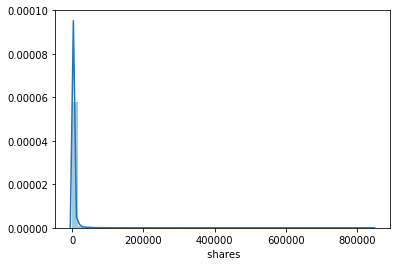

In [10]:
sns.distplot(y)

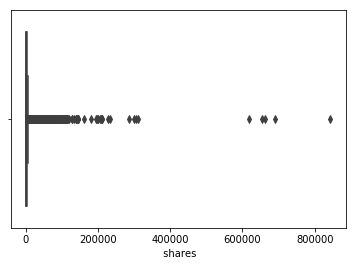

In [11]:
sns.boxplot(y)

In [12]:
y.shape

(28786,)

In [13]:
#train_data.drop(y[y.values>60000].index,inplace=True)

In [14]:
train_data.isna().sum()

 timedelta                        0
 n_tokens_title                   0
 n_tokens_content                 0
 n_unique_tokens                  0
 n_non_stop_words                 0
 n_non_stop_unique_tokens         0
 num_hrefs                        0
 num_self_hrefs                   0
 num_imgs                         0
 num_videos                       0
 average_token_length             0
 num_keywords                     0
 data_channel_is_lifestyle        0
 data_channel_is_entertainment    0
 data_channel_is_bus              0
 data_channel_is_socmed           0
 data_channel_is_tech             0
 data_channel_is_world            0
 kw_min_min                       0
 kw_max_min                       0
 kw_avg_min                       0
 kw_min_max                       0
 kw_max_max                       0
 kw_avg_max                       0
 kw_min_avg                       0
 kw_max_avg                       0
 kw_avg_avg                       0
 self_reference_min_shares  

In [15]:
#y.drop(y[y.values>60000].index,inplace=True)

In [16]:
 y.shape

(28786,)

**As mentioned above there are outliers**

**Modelling**

In [17]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [18]:
from scipy import stats
from scipy.stats import norm, skew
from statistics import mode



 mu = 3428.66 and sigma = 12693.72



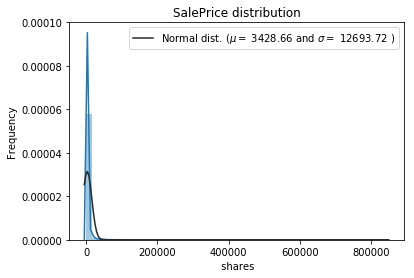

In [19]:
(mu, sigma) = norm.fit(y)

# 1. Plot Sale Price
sns.distplot((y) , fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

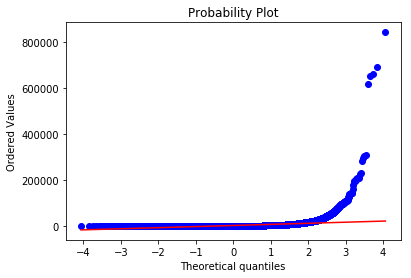

In [20]:
# 2. Plot SalePrice as a QQPlot
fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()


 mu = 7.47 and sigma = 0.93



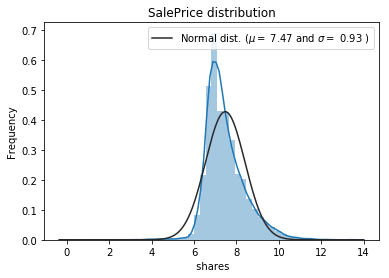

In [21]:
# The graph is highly right skewed

y=np.log(y)
(mu, sigma) = norm.fit(y)

# 1. Plot Sale Price
sns.distplot((y) , fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')

# Get the fitted parameters used by the function
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

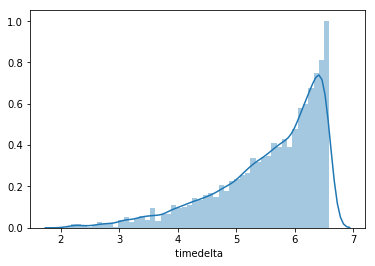

In [47]:
sns.distplot(np.log(train_data[' timedelta']))

In [51]:
skew(np.log1p(train_data))

/home/bhaskar/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log1p
  """Entry point for launching an IPython kernel.


array([-1.12215992, -0.40953436, -2.91751143,  5.179721  , -0.21803843,
        2.43718962, -0.20403363,  0.07933051,  1.00789933,  2.3301619 ,
       -5.31927748, -0.7614642 ,  3.9822435 ,  1.68637145,  1.8832694 ,
        3.75573594,  1.61666734,  1.39801908,         nan, -2.40138693,
               nan, -0.10855331, -7.24131364, -5.31069923,         nan,
       -5.18262173, -8.37668775, -1.24055102, -1.25541687, -1.3118817 ,
        1.78773627,  1.60842043,  1.58686171,  1.63420984,  2.02684183,
        3.63589742,  3.4412569 ,  2.20550906,  1.40885626,  1.86198787,
        1.150908  ,  1.11349015,  1.01100858, -2.00380887, -0.40320605,
        0.25593498,  1.39656694, -2.08095042,  0.0304225 , -1.31308721,
        2.30223715, -1.45455813,         nan,         nan,         nan,
        0.57052134,         nan, -0.69894421,  1.33120566,  1.03200923])

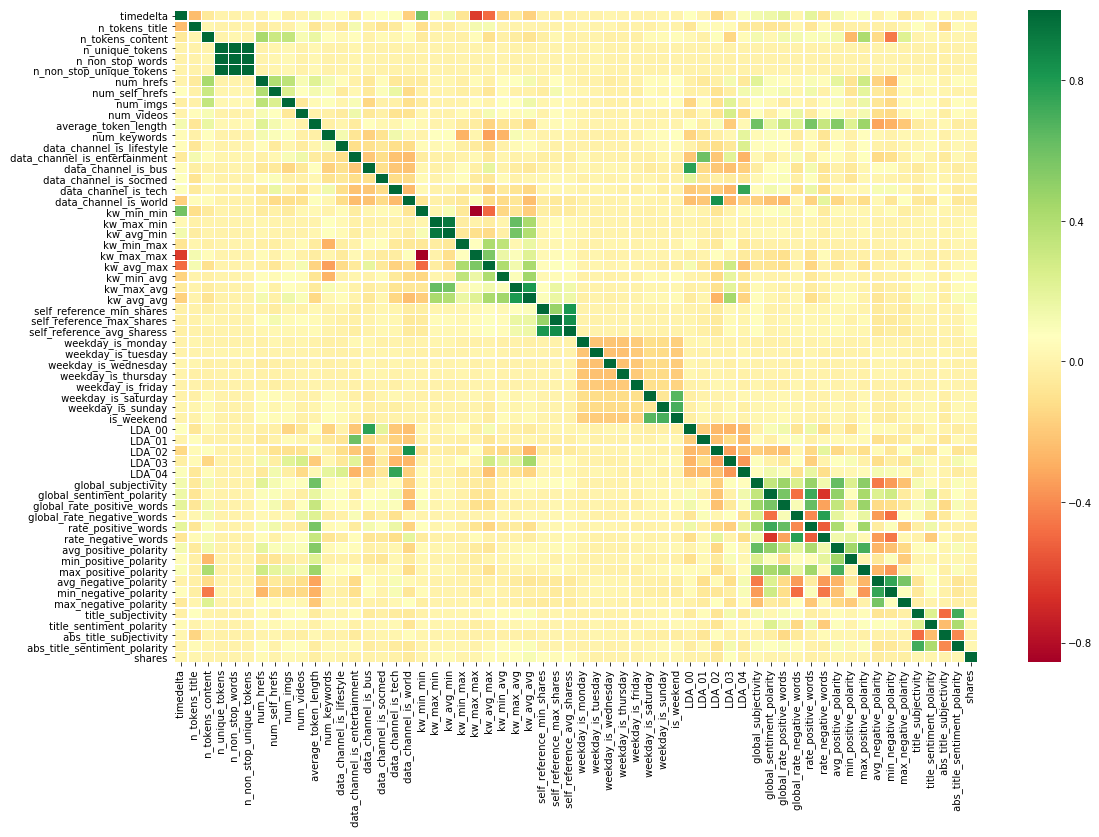

In [23]:
# Checking feature correlations
corr = train_data.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(corr, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

In [24]:
# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso, Ridge, RidgeCV, ElasticNet
import xgboost as xgb
import lightgbm as lgb
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from catboost import Pool, CatBoostRegressor, cv

In [25]:
# Set up variables
X_train = train_data.iloc[:,:-1]
X_test = test_data

# Defining two rmse_cv functions
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

In [26]:
#Setting up list of alpha's
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30]

# Iterate over alpha's
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

/home/bhaskar/.local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.197579e-17
  overwrite_a=True).T
/home/bhaskar/.local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.506375e-17
  overwrite_a=True).T
/home/bhaskar/.local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.473631e-17
  overwrite_a=True).T
/home/bhaskar/.local/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.477267e-17
  over

Text(0, 0.5, 'Rmse')

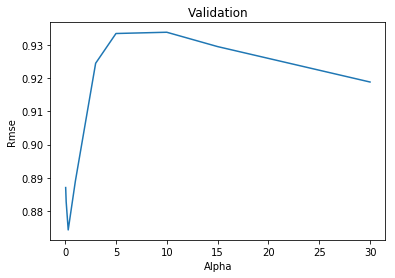

In [27]:
# Plot findings
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("Alpha")
plt.ylabel("Rmse")

In [28]:
# 5 looks like the optimal alpha level, so let's fit the Ridge model with this value
model_ridge = Ridge(alpha = 1)

Text(0, 0.5, 'Rmse')

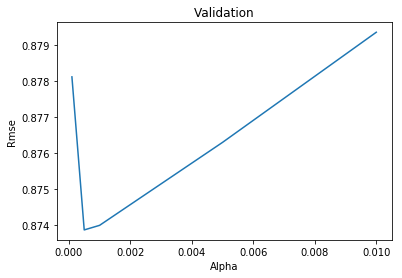

In [29]:
# Setting up list of alpha's
alphas = [0.01, 0.005, 0.001, 0.0005, 0.0001]

# Iterate over alpha's
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() for alpha in alphas]

# Plot findings
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Validation")
plt.xlabel("Alpha")
plt.ylabel("Rmse")

In [30]:
model_lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.00005))

Text(0, 0.5, 'Rmse')

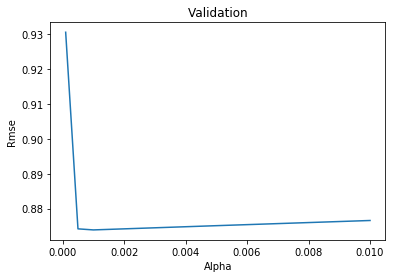

In [31]:
# Setting up list of alpha's
alphas = [0.01, 0.005, 0.001, 0.0005, 0.0001]

# Iterate over alpha's
cv_elastic = [rmse_cv(ElasticNet(alpha = alpha)).mean() for alpha in alphas]

# Plot findings
cv_elastic = pd.Series(cv_elastic, index = alphas)
cv_elastic.plot(title = "Validation")
plt.xlabel("Alpha")
plt.ylabel("Rmse")

In [32]:
model_elastic = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.001))

In [33]:
# Initiating Gradient Boosting Regressor
model_gbr = GradientBoostingRegressor(n_estimators=1200, 
                                      learning_rate=0.05,
                                      max_depth=4, 
                                      max_features='sqrt',
                                      min_samples_leaf=15, 
                                      min_samples_split=10, 
                                      loss='huber',
                                      random_state=5)

In [34]:
# Initiating XGBRegressor
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2,
                             learning_rate=0.06,
                             max_depth=3,
                             n_estimators=1150)

In [35]:
# Initiating LGBMRegressor model
model_lgb = lgb.LGBMRegressor(objective='regression',
                              num_leaves=4,
                              learning_rate=0.05, 
                              n_estimators=1080,
                              max_bin=75, 
                              bagging_fraction=0.80,
                              bagging_freq=5, 
                              feature_fraction=0.232,
                              feature_fraction_seed=9, 
                              bagging_seed=9,
                              min_data_in_leaf=6, 
                              min_sum_hessian_in_leaf=11)

In [36]:
# Initiating CatBoost Regressor model
model_cat = CatBoostRegressor(iterations=2000,
                              learning_rate=0.80,
                              depth=4,
                              l2_leaf_reg=4,
                              border_count=15,
                              loss_function='RMSE',
                              verbose=200)

In [37]:

cv_ridge = rmse_cv(model_ridge).mean()
cv_lasso = rmse_cv(model_lasso).mean()
cv_elastic = rmse_cv(model_elastic).mean()
#cv_krr = rmse_cv(model_krr).mean()
cv_gbr = rmse_cv(model_gbr).mean()
cv_xgb = rmse_cv(model_xgb).mean()
cv_lgb = rmse_cv(model_lgb).mean()
cv_cat = model_cat.fit(X_train, y)


0:	learn: 1.7667592	total: 65.3ms	remaining: 2m 10s
200:	learn: 0.7960548	total: 3.09s	remaining: 27.6s
400:	learn: 0.7718122	total: 5.99s	remaining: 23.9s
600:	learn: 0.7521322	total: 8.88s	remaining: 20.7s
800:	learn: 0.7380595	total: 11.8s	remaining: 17.6s
1000:	learn: 0.7248254	total: 14.7s	remaining: 14.6s
1200:	learn: 0.7140264	total: 17.5s	remaining: 11.6s
1400:	learn: 0.7014347	total: 20.4s	remaining: 8.72s
1600:	learn: 0.6934506	total: 23.3s	remaining: 5.79s
1800:	learn: 0.6830262	total: 26.1s	remaining: 2.88s
1999:	learn: 0.6749584	total: 29s	remaining: 0us


In [38]:
# Creating a table of results, ranked highest to lowest
results = pd.DataFrame({
    'Model': ['Ridge',
              'Lasso',
              'ElasticNet',
              'Gradient Boosting Regressor',
              'XGBoost Regressor',
              'Light Gradient Boosting Regressor',
              'CatBoost'],
    'Score': [cv_ridge,
              cv_lasso,
              cv_elastic,
              cv_gbr,
              cv_xgb,
              cv_lgb,
              cv_cat.score(X_train, y)]})

# Build dataframe of values
result_df = results.sort_values(by='Score', ascending=True).reset_index()
result_df.head(8)

,index,Model,Score
0,6,CatBoost,0.674958
1,5,Light Gradient Boosting Regressor,0.856132
2,4,XGBoost Regressor,0.859457
3,3,Gradient Boosting Regressor,0.865605
4,0,Ridge,0.888927
5,2,ElasticNet,0.955419
6,1,Lasso,0.963913


Text(0.5, 1.0, 'RMSE')

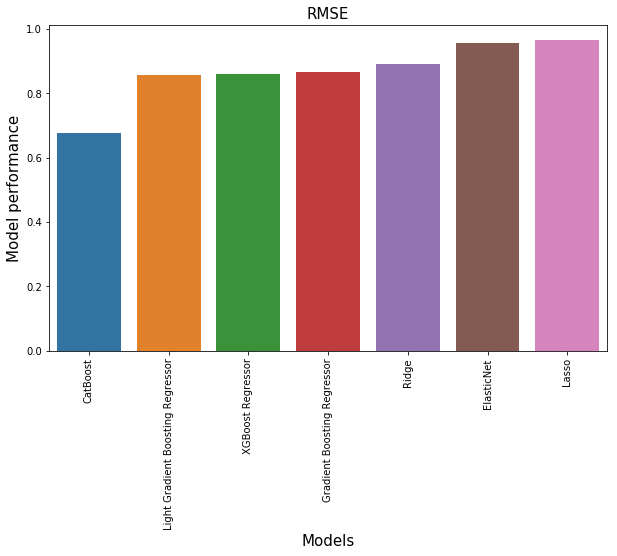

In [39]:
# Plotting model performance
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sns.barplot(x=result_df['Model'], y=result_df['Score'])
plt.xlabel('Models', fontsize=15)
plt.ylabel('Model performance', fontsize=15)
#plt.ylim(0.10, 0.115)
plt.title('RMSE', fontsize=15)

In [41]:
# Fit and predict all models
y_train=y
model_lasso.fit(X_train, y_train)
lasso_pred = np.expm1(model_lasso.predict(X_test))

model_elastic.fit(X_train, y_train)
elastic_pred = np.expm1(model_elastic.predict(X_test))

model_ridge.fit(X_train, y_train)
ridge_pred = np.expm1(model_ridge.predict(X_test))

model_xgb.fit(X_train, y_train)
xgb_pred = np.expm1(model_xgb.predict(X_test))

model_gbr.fit(X_train, y_train)
gbr_pred = np.expm1(model_gbr.predict(X_test))

model_lgb.fit(X_train, y_train)
lgb_pred = np.expm1(model_lgb.predict(X_test))

#model_krr.fit(X_train, y_train)
#krr_pred = np.expm1(model_krr.predict(X_test))

model_cat.fit(X_train, y_train)
cat_pred = np.expm1(model_cat.predict(X_test))

0:	learn: 1.7667592	total: 16.2ms	remaining: 32.4s
200:	learn: 0.7960548	total: 3.11s	remaining: 27.8s
400:	learn: 0.7718122	total: 6.09s	remaining: 24.3s
600:	learn: 0.7521322	total: 9.05s	remaining: 21.1s
800:	learn: 0.7380595	total: 12s	remaining: 18s
1000:	learn: 0.7248254	total: 14.9s	remaining: 14.9s
1200:	learn: 0.7140264	total: 17.9s	remaining: 11.9s
1400:	learn: 0.7014347	total: 20.9s	remaining: 8.92s
1600:	learn: 0.6934506	total: 23.8s	remaining: 5.92s
1800:	learn: 0.6830262	total: 26.7s	remaining: 2.95s
1999:	learn: 0.6749584	total: 29.6s	remaining: 0us


In [42]:
stacked = (lasso_pred + elastic_pred + ridge_pred + xgb_pred + lgb_pred + gbr_pred) / 6

In [43]:
s=pd.read_csv('./test_data.csv')
sub=pd.DataFrame()
sub['url_id']=s['url_id']
sub['shares']=stacked
sub.to_csv('s9.csv',index=False)
del s

In [24]:
#clf = RandomForestRegressor(max_depth=4, random_state=1, n_estimators=10)
#clf = SVR(gamma=0.01, C=0.01, kernel='rbf')
K = 2
kf = KFold(n_splits=K, shuffle=True, random_state=42)

avg_list=[]


for train_index, val_index in kf.split(tr, y):
     # split data
    X_train, X_val = tr.iloc[train_index], tr.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_val)
    mape=mean_absolute_percentage_error(y_val, y_pred)
    print("MAPE: ", mape)
    #avg_list.append(mape)


NameError: name 'KFold' is not defined

In [21]:
clf.fit(train_data,y)
pred=clf.predict(test_data)

In [22]:
s=pd.read_csv('./test_data.csv')
sub=pd.DataFrame()
sub['url_id']=s['url_id']
sub['shares']=pred
sub.to_csv('s5_68.csv',index=False)
del s

In [19]:
pred=clf.predict(train_data)
mean_absolute_percentage_error(y, pred)

69.30770444672217